In [2]:
import xarray as xr
import cf_xarray # This is a wrapper for xarray that allows access to the data through standard coordinate names
import fsspec
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

In [5]:
fs = fsspec.filesystem(
    "reference", 
    fo='s3://noaa-oar-cefi-regional-mom6-pds/northwest_atlantic/full_domain/seasonal_reforecast/monthly/regrid/r20250212/all.json',
    remote_protocol="s3", 
    remote_options={"anon":True},
    skip_instance_cache=True,
    target_options={"anon": True}
)
m = fs.get_mapper()
all = xr.open_dataset(m, engine='zarr', consolidated=False)
all

<xarray.Dataset> Size: 113GB
Dimensions:    (init_time: 120, lat: 844, lead: 12, lon: 774, member: 5)
Coordinates:
    init       (init_time) datetime64[ns] 960B ...
  * init_time  (init_time) datetime64[ns] 960B 1994-02-01 ... 2023-12-01
  * lat        (lat) float64 7kB 5.273 5.335 5.398 5.461 ... 58.04 58.1 58.16
  * lead       (lead) int64 96B 0 1 2 3 4 5 6 7 8 9 10 11
  * lon        (lon) float64 6kB -98.44 -98.36 -98.28 ... -36.24 -36.16 -36.08
  * member     (member) int32 20B 1 2 3 4 5
    month      (init_time) float64 960B ...
Data variables:
    sos        (init_time, member, lead, lat, lon) float32 19GB ...
    sos_anom   (init_time, member, lead, lat, lon) float32 19GB ...
    tob        (init_time, member, lead, lat, lon) float32 19GB ...
    tob_anom   (init_time, member, lead, lat, lon) float32 19GB ...
    tos        (init_time, member, lead, lat, lon) float32 19GB ...
    tos_anom   (init_time, member, lead, lat, lon) float32 19GB ...
Attributes: (12/25)
    associated_files:       areacello: 19940201.ocean_static.nc
    cefi_archive_version:   /archive/Andrew.C.Ross/fre/NWA/2024_09/NWA12_coba...
    cefi_aux:               Postprocessed Data : regrid to regular grid
    cefi_data_doi:          10.5281/zenodo.10642295
    cefi_date_range:        N/A
    cefi_ensemble_info:     enss
    ...                     ...
    cefi_run_xml:           N/A
    cefi_subdomain:         full
    cefi_variable:          sos
    grid_tile:              N/A
    grid_type:              regular
    title:                  NWA12_cobalt_forecast_2024_09_1994-02-e01

In [6]:
slice=all.sel(init_time='2003-06-01T00:00:00.000000000', member=4, lead=11)
slice

<xarray.Dataset> Size: 16MB
Dimensions:    (lat: 844, lon: 774)
Coordinates:
    init       datetime64[ns] 8B ...
    init_time  datetime64[ns] 8B 2003-06-01
  * lat        (lat) float64 7kB 5.273 5.335 5.398 5.461 ... 58.04 58.1 58.16
    lead       int64 8B 11
  * lon        (lon) float64 6kB -98.44 -98.36 -98.28 ... -36.24 -36.16 -36.08
    member     int32 4B 4
    month      float64 8B ...
Data variables:
    sos        (lat, lon) float32 3MB ...
    sos_anom   (lat, lon) float32 3MB ...
    tob        (lat, lon) float32 3MB ...
    tob_anom   (lat, lon) float32 3MB ...
    tos        (lat, lon) float32 3MB ...
    tos_anom   (lat, lon) float32 3MB ...
Attributes: (12/25)
    associated_files:       areacello: 19940201.ocean_static.nc
    cefi_archive_version:   /archive/Andrew.C.Ross/fre/NWA/2024_09/NWA12_coba...
    cefi_aux:               Postprocessed Data : regrid to regular grid
    cefi_data_doi:          10.5281/zenodo.10642295
    cefi_date_range:        N/A
    cefi_ensemble_info:     enss
    ...                     ...
    cefi_run_xml:           N/A
    cefi_subdomain:         full
    cefi_variable:          sos
    grid_tile:              N/A
    grid_type:              regular
    title:                  NWA12_cobalt_forecast_2024_09_1994-02-e01

In [7]:
xmin = slice.cf['longitude'].min()
xmax = slice.cf['longitude'].max()
ymin = slice.cf['latitude'].min()
ymax = slice.cf['latitude'].max()
aspect = (xmax-xmin)/(ymax-ymin)

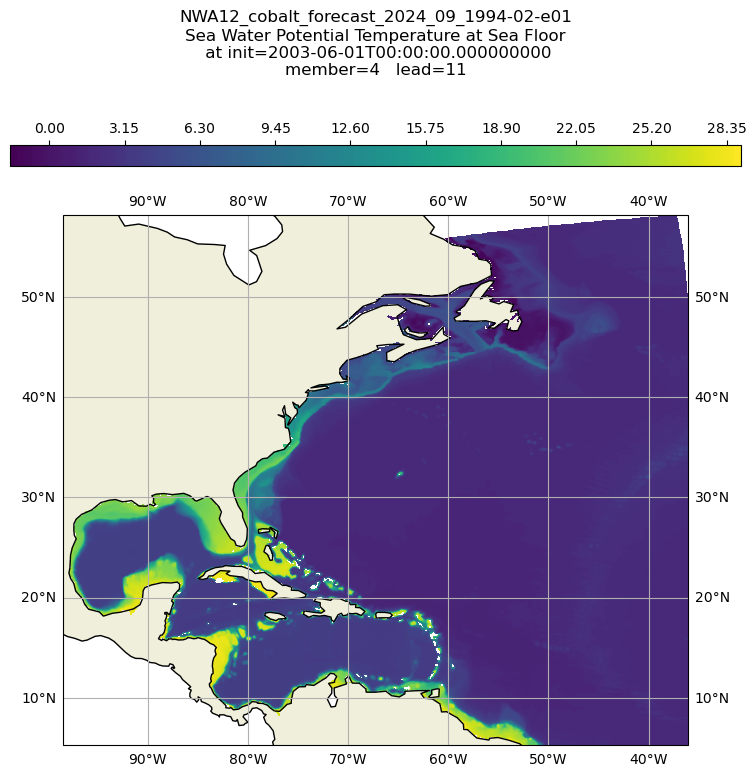

In [8]:
plt.figure(figsize=(8*aspect,8))
proj = ccrs.PlateCarree(central_longitude=-180)
proj180 = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.set_extent([xmin, xmax, ymin, ymax], crs=proj180)
# add some features to make the map a little more polished
ax.add_feature(cartopy.feature.LAND)
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
ct = ax.contourf(slice.cf['longitude'], slice.cf['latitude'], slice['tob'], levels=255, transform=proj180, cmap="viridis")
plt.colorbar(ct, orientation='horizontal',pad=0.08, aspect=35, fraction=.06, location='top')
plt.title(str(slice.attrs['title']) + '\n'+slice['tob'].attrs['long_name']+'\n at init=' + str(slice['init_time'].values)+'\nmember='+str(slice['member'].values)+'   lead='+str(slice['lead'].values), y=1.25)
plt.show()